In [1]:
import numpy as np
import matplotlib.pyplot as plt
        

In [2]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [31]:
pd_input = pd.read_csv('input.csv')
pd_input.columns = np.arange(1,217)

In [32]:
pd_output = pd.read_csv('output.csv')
pd_output.columns = np.arange(1,217)

In [36]:
pd_output_label = pd.read_csv('output_label.csv')

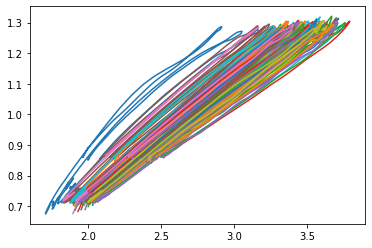

In [29]:
for i in range(1,100):
    plt.plot(pd_input.iloc[i,:],pd_output.iloc[i,:])

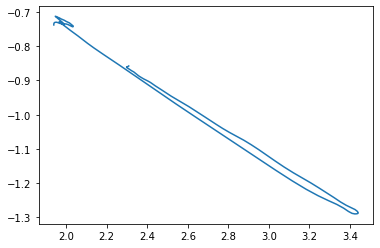

In [200]:
plt.plot(pd_input.iloc[29000,:],pd_output.iloc[29000,:])

In [44]:
together = pd.concat([pd_input, pd_output_label], axis=1)
togeth = together.to_numpy()
np.random.shuffle(togeth)
X_random = togeth[:, :216]
Y_random = togeth[:, 216, None]


In [45]:
for i in range(Y_random.shape[0]):
    if(Y_random[i,0] == -1):
        Y_random[i,0] = 0


In [130]:

print("Shape of X: {}".format(X_random.shape))
print("Shape of Y: {} ".format(Y_random.shape))


Shape of X: (36962, 216)
Shape of Y: (36962, 1) 


In [131]:
from sklearn.model_selection import train_test_split

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X_random, Y_random, test_size=0.30, random_state=101)

In [133]:
from sklearn.linear_model import LogisticRegression

In [134]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Ayush\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ayush\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [135]:
predictions = logmodel.predict(X_test)

In [136]:
from sklearn.metrics import classification_report,confusion_matrix

In [138]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[7231  366]
 [1097 2395]]
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      7597
         1.0       0.87      0.69      0.77      3492

    accuracy                           0.87     11089
   macro avg       0.87      0.82      0.84     11089
weighted avg       0.87      0.87      0.86     11089



In [75]:
X1 = pd_input.loc[pd_output_label.iloc[:,0]==-1,:]

In [77]:
X2 = pd_input.loc[pd_output_label.iloc[:,0]==1,:]

In [96]:
y1 = pd_output.loc[pd_output_label.iloc[:,0]==-1,:]

In [97]:
y2 = pd_output.loc[pd_output_label.iloc[:,0]==1,:]

In [98]:
together_reg = pd.concat([X1,y1], axis=1)
togeth_reg = together_reg.to_numpy()
np.random.shuffle(togeth_reg)
X_random1 = togeth_reg[:, :216]
Y_random1 = togeth_reg[:, 216:]


In [104]:
together_reg2 = pd.concat([X2,y2], axis=1)
togeth_reg2 = together_reg2.to_numpy()
np.random.shuffle(togeth_reg2)
X_random2 = togeth_reg2[:, :216]
Y_random2 = togeth_reg2[:, 216:]


In [149]:
from sklearn.model_selection import train_test_split

In [173]:
from sklearn.linear_model import LinearRegression 
reg_model = LinearRegression()
intercept_array=np.zeros(X_random1.shape[0]);
coeff_array =np.zeros(X_random1.shape[0]);

In [180]:
for j in range(0,X_random1.shape[0]): 
    X_random1_single = X_random1[j,:,None]
    y_random1_single = Y_random1[j,:]
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X_random1_single,y_random1_single, test_size=0.30, random_state=101)
    reg_model.fit(X_train1,y_train1)
    predictions = reg_model.predict(X_test1)
    intercept_array[j] = reg_model.intercept_ 
    coeff_array[j] = reg_model.coef_

In [182]:
reg_model2 = LinearRegression()
intercept_array2=np.zeros(X_random2.shape[0]);
coeff_array2 =np.zeros(X_random2.shape[0]);

In [183]:
for j in range(0,X_random2.shape[0]): 
    X_random2_single = X_random2[j,:,None]
    y_random2_single = Y_random2[j,:]
    X_train2, X_test2, y_train2, y_test2 = train_test_split(X_random2_single,y_random2_single, test_size=0.30, random_state=101)
    reg_model2.fit(X_train2,y_train2)
    predictions2 = reg_model2.predict(X_test2)
    intercept_array2[j] = reg_model2.intercept_ 
    coeff_array2[j] = reg_model2.coef_

In [189]:
coeff_array1_mean = np.mean(coeff_array)
intercept_array1_mean = np.mean(intercept_array)
coeff_array2_mean = np.mean(coeff_array2)
intercept_array2_mean = np.mean(intercept_array2)


In [190]:
pd_input.iloc[0,:]

1      1.9631
2      1.9772
3      1.9897
4      1.9965
5      1.9997
        ...  
212    2.3732
213    2.3744
214    2.3743
215    2.3742
216    2.3747
Name: 0, Length: 216, dtype: float64

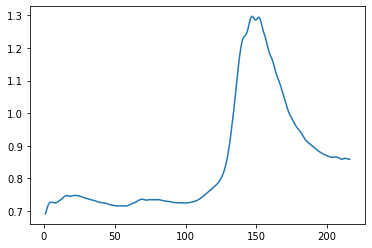

In [208]:
plt.plot(pd_output.iloc[0,:])

In [194]:
pd_input.iloc[0,:]*coeff_array1_mean+intercept_array1_mean

1      0.719913
2      0.725287
3      0.730052
4      0.732643
5      0.733863
         ...   
212    0.876225
213    0.876682
214    0.876644
215    0.876606
216    0.876797
Name: 0, Length: 216, dtype: float64

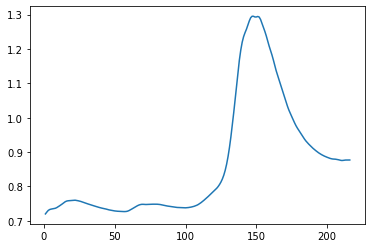

In [207]:
plt.plot(pd_input.iloc[0,:]*coeff_array1_mean+intercept_array1_mean)

In [196]:
pd_input.iloc[29000,:]

1      1.9393
2      1.9394
3      1.9408
4      1.9433
5      1.9473
        ...  
212    2.2981
213    2.2989
214    2.3012
215    2.3049
216    2.3088
Name: 29000, Length: 216, dtype: float64

In [197]:
pd_output.iloc[29000,:]

1     -0.73802
2     -0.73525
3     -0.73238
4     -0.73089
5     -0.73026
        ...   
212   -0.86085
213   -0.86126
214   -0.86080
215   -0.85941
216   -0.85768
Name: 29000, Length: 216, dtype: float64

In [204]:
pd_input.iloc[29000,:]*coeff_array2_mean+intercept_array2_mean

1     -0.716544
2     -0.716584
3     -0.717147
4     -0.718154
5     -0.719764
         ...   
212   -0.860954
213   -0.861276
214   -0.862202
215   -0.863691
216   -0.865261
Name: 29000, Length: 216, dtype: float64

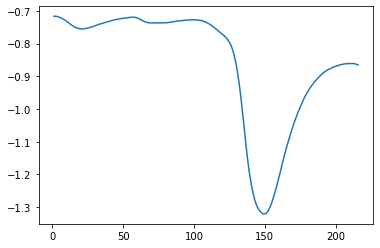

In [206]:
plt.plot(pd_input.iloc[29000,:]*coeff_array2_mean+intercept_array2_mean)